In [1]:
pip install opencv-python numpy scikit-learn scikit-image matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/35/80/faf325a7aef1d07067dab5ff7a890da229b42a641d2e85c98f3675cd36a2/scikit_image-0.25.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imageio!=2.35.0,>=2.33 from https://files.pythonhosted.org/packages/cb/bd/b394387b598ed84d8d0fa90611a90bee0adc2021820ad5729f7ced74a8e2/imageio-2.37.0-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/59/50/7bef6a1259a2c4b81823653a69d2d51074f7b8095db2abae5abee962ab87/tifffile-2025.1.10-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.4 from https://files.pythonhosted.org/packages/83/60/d497a310bde3f01cb8051

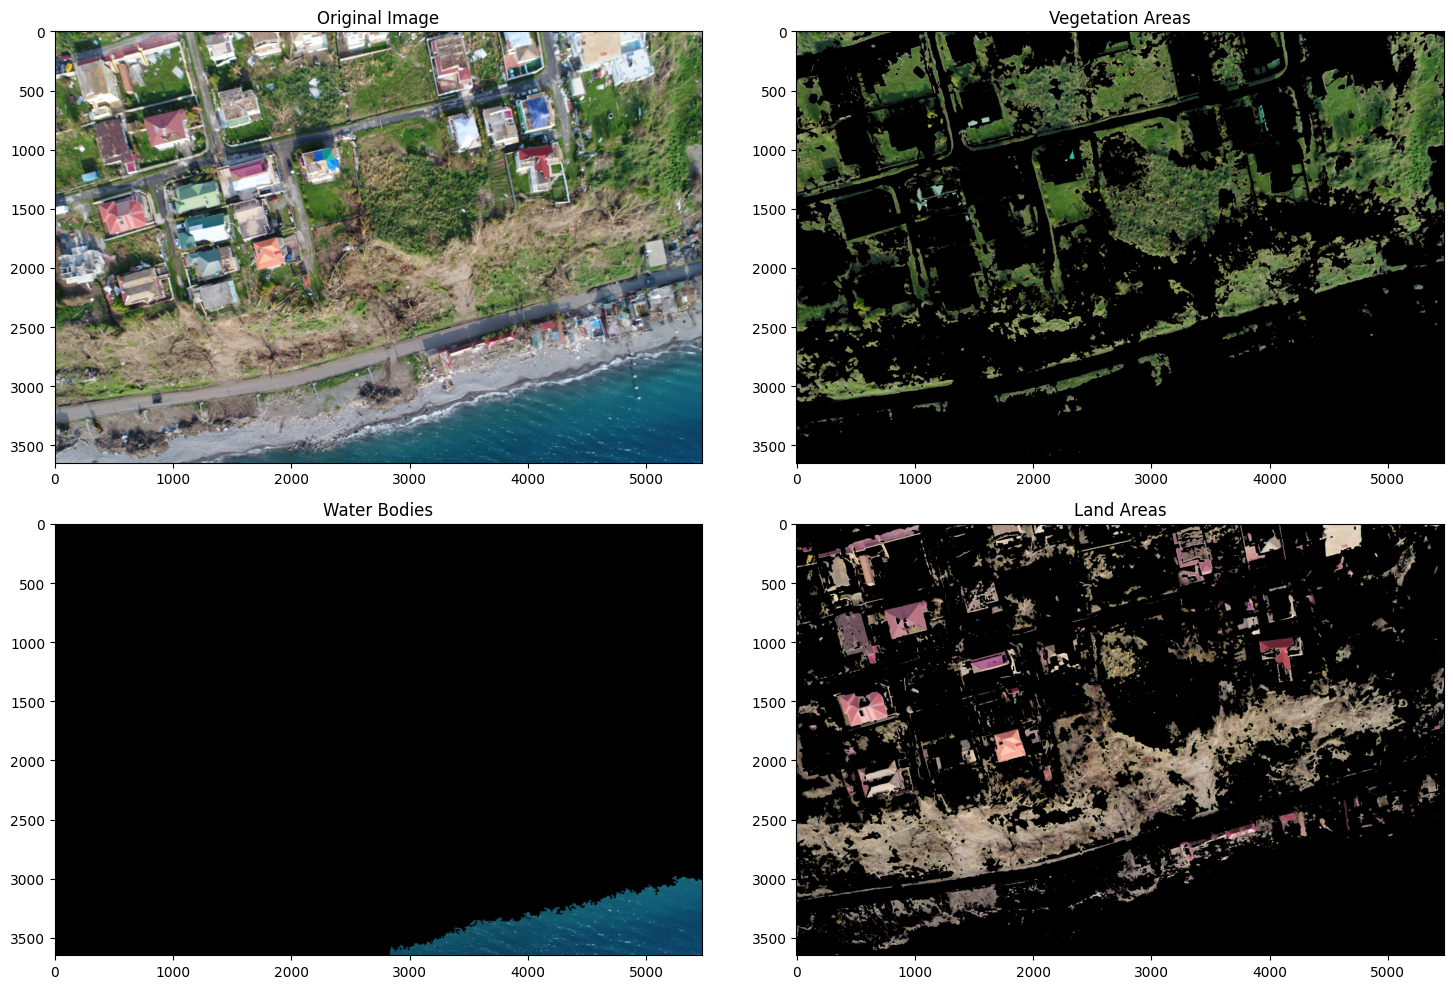

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image {img_path}")
        return
        
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Vegetation (green)
    lower_vegetation = np.array([30, 40, 40])
    upper_vegetation = np.array([85, 255, 255])
    
    # Water (dark blue)
    lower_water = np.array([100, 50, 50])
    upper_water = np.array([140, 255, 255])
    
    # Land (red/orange and magenta)
    lower_land1 = np.array([0, 30, 40])
    upper_land1 = np.array([25, 255, 255])
    lower_land2 = np.array([160, 30, 40])
    upper_land2 = np.array([180, 255, 255])
    
    # Create masks
    vegetation_mask = cv2.inRange(hsv, lower_vegetation, upper_vegetation)
    water_mask = cv2.inRange(hsv, lower_water, upper_water)
    land_mask = cv2.bitwise_or(
        cv2.inRange(hsv, lower_land1, upper_land1),
        cv2.inRange(hsv, lower_land2, upper_land2)
    )
    
    # Enhance water detection for darker areas
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blue_dominance = rgb[:,:,2] > (rgb[:,:,0] * 1.2)  
    blue_dominance = blue_dominance & (rgb[:,:,2] > (rgb[:,:,1] * 1.2))  
    blue_dominance = blue_dominance.astype(np.uint8) * 255
    water_mask = cv2.bitwise_or(water_mask, blue_dominance)
    
    # Clean up masks
    kernel = np.ones((5,5), np.uint8)
    water_mask = cv2.morphologyEx(water_mask, cv2.MORPH_CLOSE, kernel)
    water_mask = cv2.morphologyEx(water_mask, cv2.MORPH_OPEN, kernel)
    
    # Remove small regions and keep only the largest water body
    contours, _ = cv2.findContours(water_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        water_mask = np.zeros_like(water_mask)
        cv2.drawContours(water_mask, [largest_contour], -1, 255, -1)
    
    # Create priority-based segmentation
    combined_mask = np.zeros_like(vegetation_mask)
    combined_mask = np.where(water_mask > 0, 1, combined_mask)
    combined_mask = np.where(vegetation_mask > 0, 2, combined_mask)
    combined_mask = np.where(land_mask > 0, 3, combined_mask)
    
    # Create segmented images
    segmented = np.zeros_like(img)
    segmented[combined_mask == 1] = [255, 0, 0]    # Water - Blue
    segmented[combined_mask == 2] = [0, 255, 0]    # Vegetation - Green
    segmented[combined_mask == 3] = [0, 0, 255]    # Land - Red
    
    # Create individual channel displays
    water_display = np.zeros_like(img)
    water_display[combined_mask == 1] = img[combined_mask == 1]
    
    vegetation_display = np.zeros_like(img)
    vegetation_display[combined_mask == 2] = img[combined_mask == 2]
    
    land_display = np.zeros_like(img)
    land_display[combined_mask == 3] = img[combined_mask == 3]
    
    # Convert to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    water_rgb = cv2.cvtColor(water_display, cv2.COLOR_BGR2RGB)
    vegetation_rgb = cv2.cvtColor(vegetation_display, cv2.COLOR_BGR2RGB)
    land_rgb = cv2.cvtColor(land_display, cv2.COLOR_BGR2RGB)
    
    # Plot results
    plt.figure(figsize=(15, 10))
    
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    
    plt.subplot(222)
    plt.imshow(vegetation_rgb)
    plt.title("Vegetation Areas")
    
    plt.subplot(223)
    plt.imshow(water_rgb)
    plt.title("Water Bodies")
    
    plt.subplot(224)
    plt.imshow(land_rgb)
    plt.title("Land Areas")
    
    plt.tight_layout()
    plt.show()
segment_image("DJI_0073.JPG")

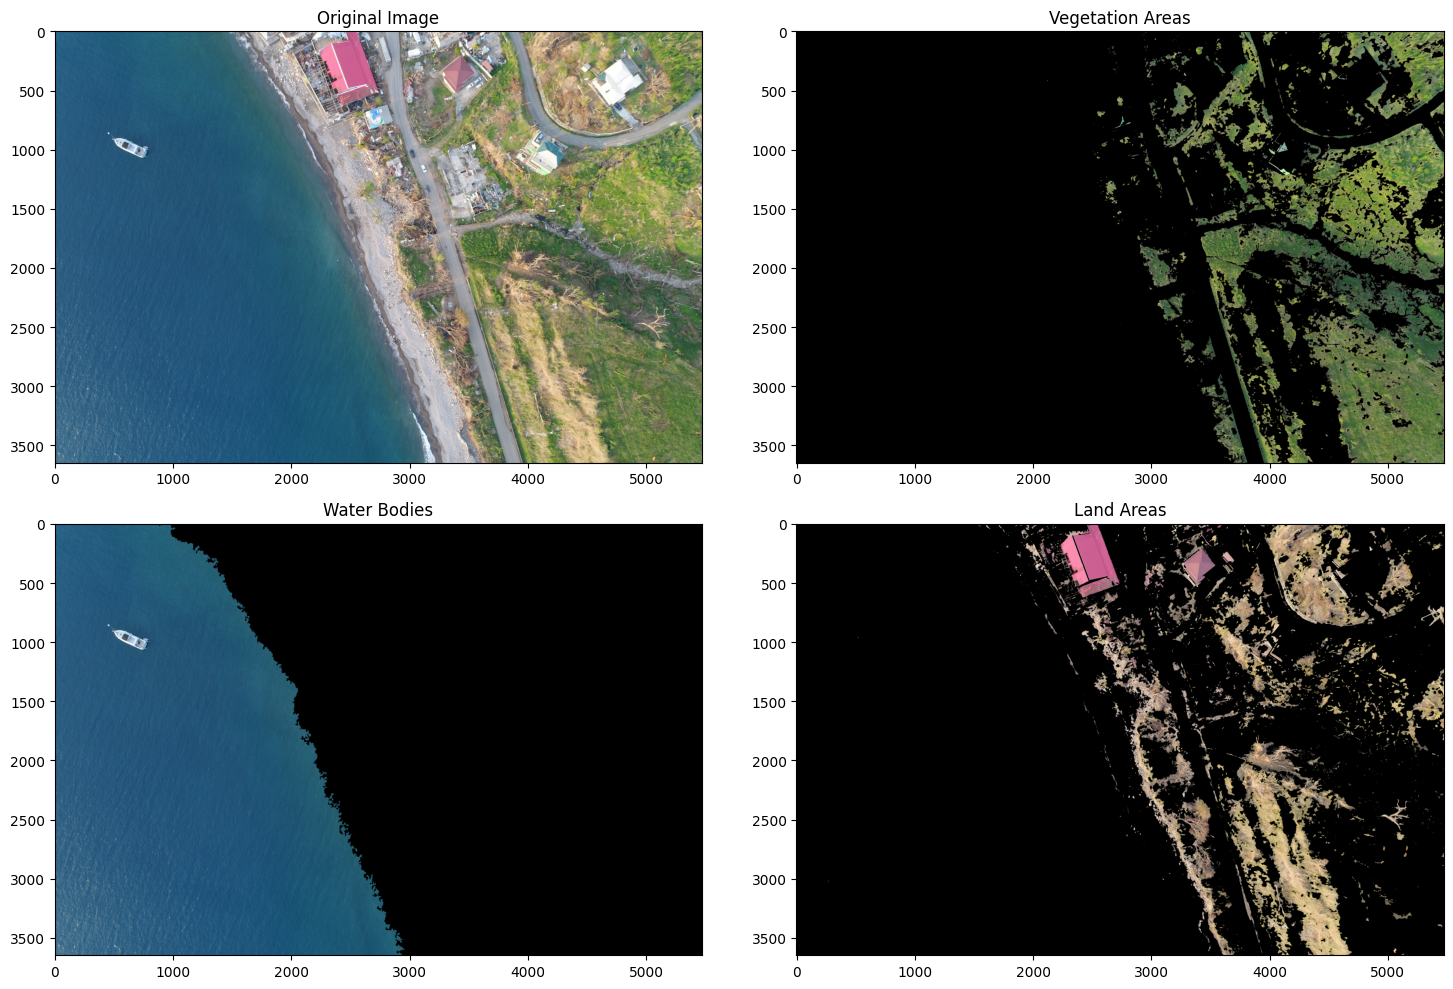

In [7]:
segment_image("Flight_2 (150).JPG")

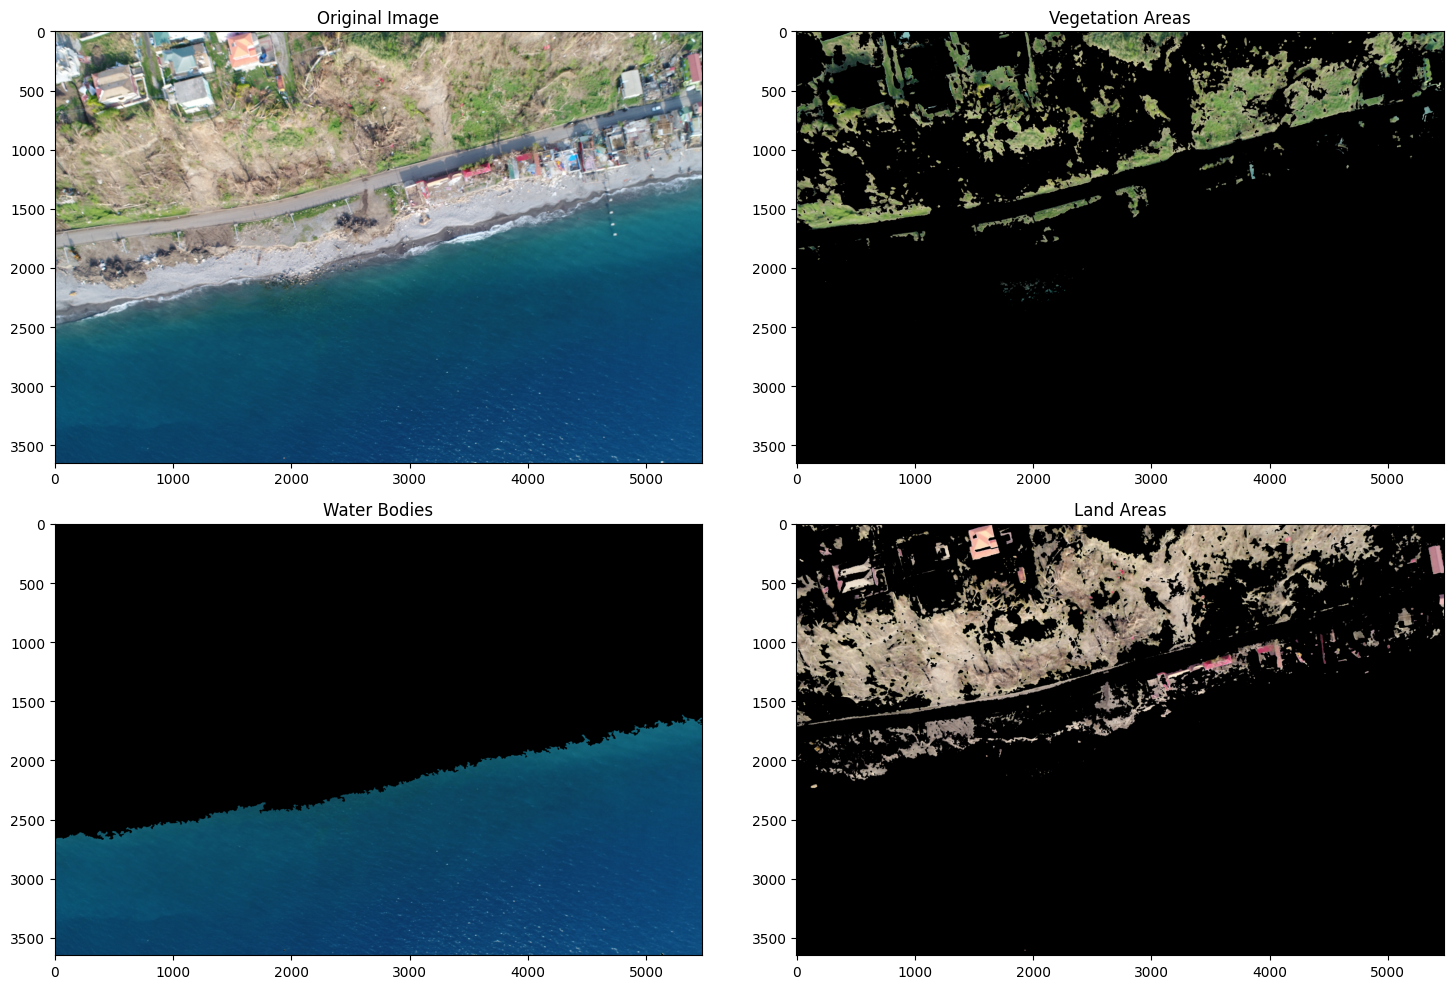

In [23]:
segment_image("DJI_0082.JPG")

In [8]:
 cd C:\Users\nitin\100daysML\intern

C:\Users\nitin\100daysML\intern


In [12]:
!git init

Initialized empty Git repository in C:/Users/nitin/100daysML/intern/.git/


In [11]:
!git --version


git version 2.39.1.windows.1


In [14]:
!git remote add origin https://github.com/NitinGautam05/Land-Cover-Classification.git